In [1]:
"""
Dataset Description:
-Total rows : 8000

The spotify_churn_dataset.csv contains information about Spotify users and whether they have churned (stopped using the service).
It includes the following columns:

- user_id: Unique identifier for each user.
- gender: Gender of the user (Female, Male, Other).
- age: Age of the user.
- country: Country of the user.
- subscription_type: Type of subscription (Free, Premium, Family, Student).
- listening_time: Total listening time in minutes.
- songs_played_per_day: Average number of songs played per day.
- skip_rate: Rate at which users skip songs.
- device_type: Device used by the user (Mobile, Desktop, Web).
- ads_listened_per_week: Number of ads listened to per week.
- offline_listening: Whether the user listens offline (0: No, 1: Yes).
- is_churned: Target variable, indicating whether the user has churned (0: No, 1: Yes).
"""

'\nDataset Description:\n\nThe spotify_churn_dataset.csv contains information about Spotify users and whether they have churned (stopped using the service).\nIt includes the following columns:\n\n- user_id: Unique identifier for each user.\n- gender: Gender of the user (Female, Male, Other).\n- age: Age of the user.\n- country: Country of the user.\n- subscription_type: Type of subscription (Free, Premium, Family, Student).\n- listening_time: Total listening time in minutes.\n- songs_played_per_day: Average number of songs played per day.\n- skip_rate: Rate at which users skip songs.\n- device_type: Device used by the user (Mobile, Desktop, Web).\n- ads_listened_per_week: Number of ads listened to per week.\n- offline_listening: Whether the user listens offline (0: No, 1: Yes).\n- is_churned: Target variable, indicating whether the user has churned (0: No, 1: Yes).\n'

# Task
Analyze and visualize the "spotify_churn_dataset.csv" dataset using PySpark to understand user churn.

## Install pyspark and findspark

### Subtask:
Install the necessary libraries for using PySpark in Colab.


**Reasoning**:
Install the required libraries `pyspark` and `findspark` using pip.



In [1]:
!pip install pyspark findspark

## Initialize sparksession

### Subtask:
Set up the SparkSession, which is the entry point for any PySpark functionality.


**Reasoning**:
Set up the SparkSession using PySpark.



In [2]:
from pyspark.sql import SparkSession
import findspark

findspark.init()

spark = SparkSession.builder \
    .appName("Spotify Churn Analysis") \
    .getOrCreate()

print(spark)

## Load the dataset

### Subtask:
Load the `spotify_churn_dataset.csv` file into a Spark DataFrame.


**Reasoning**:
Load the data from the CSV file into a Spark DataFrame using the specified options.



In [3]:
df = spark.read.csv("spotify_churn_dataset.csv", header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- user_id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- subscription_type: string (nullable = true)
 |-- listening_time: integer (nullable = true)
 |-- songs_played_per_day: integer (nullable = true)
 |-- skip_rate: double (nullable = true)
 |-- device_type: string (nullable = true)
 |-- ads_listened_per_week: integer (nullable = true)
 |-- offline_listening: integer (nullable = true)
 |-- is_churned: integer (nullable = true)

+-------+------+---+-------+-----------------+--------------+--------------------+---------+-----------+---------------------+-----------------+----------+
|user_id|gender|age|country|subscription_type|listening_time|songs_played_per_day|skip_rate|device_type|ads_listened_per_week|offline_listening|is_churned|
+-------+------+---+-------+-----------------+--------------+--------------------+---------+-----------+---------------------+-----------------+-----

## Data exploration

### Subtask:
Perform initial data exploration to understand the structure and content of the dataset. This includes displaying the schema, showing a few rows, and calculating basic statistics.


**Reasoning**:
Display the schema, show the first few rows, and calculate basic statistics for the DataFrame to perform initial data exploration.



In [4]:
df.printSchema()
df.show(5)
df.describe().show()

root
 |-- user_id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- subscription_type: string (nullable = true)
 |-- listening_time: integer (nullable = true)
 |-- songs_played_per_day: integer (nullable = true)
 |-- skip_rate: double (nullable = true)
 |-- device_type: string (nullable = true)
 |-- ads_listened_per_week: integer (nullable = true)
 |-- offline_listening: integer (nullable = true)
 |-- is_churned: integer (nullable = true)

+-------+------+---+-------+-----------------+--------------+--------------------+---------+-----------+---------------------+-----------------+----------+
|user_id|gender|age|country|subscription_type|listening_time|songs_played_per_day|skip_rate|device_type|ads_listened_per_week|offline_listening|is_churned|
+-------+------+---+-------+-----------------+--------------+--------------------+---------+-----------+---------------------+-----------------+-----

## Data cleaning and preparation

### Subtask:
Handle missing values, outliers, and transform data types if necessary. This might involve dropping columns, filling missing values, or casting columns to appropriate types.


**Reasoning**:
Check for missing values in each column of the DataFrame.



In [5]:
from pyspark.sql.functions import col, sum

df.select([sum(col(c).isNull().cast("integer")).alias(c) for c in df.columns]).show()

+-------+------+---+-------+-----------------+--------------+--------------------+---------+-----------+---------------------+-----------------+----------+
|user_id|gender|age|country|subscription_type|listening_time|songs_played_per_day|skip_rate|device_type|ads_listened_per_week|offline_listening|is_churned|
+-------+------+---+-------+-----------------+--------------+--------------------+---------+-----------+---------------------+-----------------+----------+
|      0|     0|  0|      0|                0|             0|                   0|        0|          0|                    0|                0|         0|
+-------+------+---+-------+-----------------+--------------+--------------------+---------+-----------+---------------------+-----------------+----------+



In [14]:
print(f"Number of records in the dataset: {df.count()}")

Number of records in the dataset: 8000


In [6]:
df.describe().show()
df.printSchema()

+-------+------------------+------+-----------------+-------+-----------------+-----------------+--------------------+-------------------+-----------+---------------------+-------------------+------------------+
|summary|           user_id|gender|              age|country|subscription_type|   listening_time|songs_played_per_day|          skip_rate|device_type|ads_listened_per_week|  offline_listening|        is_churned|
+-------+------------------+------+-----------------+-------+-----------------+-----------------+--------------------+-------------------+-----------+---------------------+-------------------+------------------+
|  count|              8000|  8000|             8000|   8000|             8000|             8000|                8000|               8000|       8000|                 8000|               8000|              8000|
|   mean|            4000.5|  NULL|        37.662125|   NULL|             NULL|        154.06825|            50.12725| 0.3001274999999984|       NULL|  

## Feature engineering

### Subtask:
Create new features that could be useful for analysis and modeling. This could involve extracting information from existing columns or creating interaction terms.


**Reasoning**:
Calculate the ratio of songs played per day to listening time, create a binary feature for offline listening, and combine subscription type and device type into a new categorical feature.



In [7]:
from pyspark.sql.functions import when, concat_ws

# 1. Calculate songs per minute, handling division by zero
df = df.withColumn(
    "songs_per_minute",
    when(col("listening_time") > 0, col("songs_played_per_day") / col("listening_time")).otherwise(0)
)

# 2. Create binary feature for offline listening
df = df.withColumn(
    "has_offline_listening",
    when(col("offline_listening") > 0, 1).otherwise(0)
)

# 3. Create combined subscription and device feature
df = df.withColumn(
    "subscription_device",
    concat_ws("_", col("subscription_type"), col("device_type"))
)

df.printSchema()
df.show(5)

root
 |-- user_id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- subscription_type: string (nullable = true)
 |-- listening_time: integer (nullable = true)
 |-- songs_played_per_day: integer (nullable = true)
 |-- skip_rate: double (nullable = true)
 |-- device_type: string (nullable = true)
 |-- ads_listened_per_week: integer (nullable = true)
 |-- offline_listening: integer (nullable = true)
 |-- is_churned: integer (nullable = true)
 |-- songs_per_minute: double (nullable = true)
 |-- has_offline_listening: integer (nullable = false)
 |-- subscription_device: string (nullable = false)

+-------+------+---+-------+-----------------+--------------+--------------------+---------+-----------+---------------------+-----------------+----------+-------------------+---------------------+-------------------+
|user_id|gender|age|country|subscription_type|listening_time|songs_played_per_day|skip_r

## Exploratory data analysis (eda)

### Subtask:
Perform detailed analysis and visualization to identify patterns, trends, and relationships in the data. This could involve calculating aggregations, creating visualizations (using libraries like Matplotlib or Seaborn after converting to Pandas DataFrame if needed), and exploring the target variable (churn).


**Reasoning**:
Calculate the overall churn rate, churn rate by categorical features, and descriptive statistics for numerical features based on churn status. Then, convert the results for categorical churn rates and numerical statistics to Pandas DataFrames for visualization.



In [8]:
from pyspark.sql.functions import count, when, mean, median

# 1. Calculate overall churn rate
total_users = df.count()
churned_users = df.filter(df.is_churned == 1).count()
overall_churn_rate = (churned_users / total_users) * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

# 2. Calculate churn rate by categorical features
categorical_features = ["gender", "country", "subscription_type", "device_type", "has_offline_listening", "subscription_device"]

churn_rates_by_category = {}
for feature in categorical_features:
    churn_rate_df = df.groupBy(feature).agg(
        (count(when(col("is_churned") == 1, True)) / count("*") * 100).alias("churn_rate")
    ).orderBy(feature)
    churn_rates_by_category[feature] = churn_rate_df.toPandas()

# 3. Calculate descriptive statistics for numerical features by churn status
numerical_features = ["age", "listening_time", "songs_played_per_day", "skip_rate", "ads_listened_per_week", "songs_per_minute"]

numerical_stats_by_churn = {}
for feature in numerical_features:
    stats_df = df.groupBy("is_churned").agg(
        mean(col(feature)).alias(f"{feature}_mean")
        # Spark's median is approximate, using mean for simplicity here
        # median(col(feature)).alias(f"{feature}_median")
    ).orderBy("is_churned")
    numerical_stats_by_churn[feature] = stats_df.toPandas()

# Display some of the results for verification
print("\nChurn Rate by Gender:")
display(churn_rates_by_category["gender"])

print("\nMean of Numerical Features by Churn Status:")
for feature, stats_df_pandas in numerical_stats_by_churn.items():
    print(f"\n{feature}:")
    display(stats_df_pandas)

Overall Churn Rate: 25.89%

Churn Rate by Gender:


,gender,churn_rate
0,Female,26.288078
1,Male,25.195095
2,Other,26.188679



Mean of Numerical Features by Churn Status:

age:


,is_churned,age_mean
0,0,37.632147
1,1,37.747948



listening_time:


,is_churned,listening_time_mean
0,0,154.446787
1,1,152.984549



songs_played_per_day:


,is_churned,songs_played_per_day_mean
0,0,49.970653
1,1,50.575567



skip_rate:


,is_churned,skip_rate_mean
0,0,0.298474
1,1,0.304862



ads_listened_per_week:


,is_churned,ads_listened_per_week_mean
0,0,6.962220
1,1,6.891357



songs_per_minute:


,is_churned,songs_per_minute_mean
0,0,0.604687
1,1,0.611872


**Reasoning**:
Visualize the churn rates for categorical features using bar plots and the mean of numerical features by churn status using bar plots to identify potential factors influencing churn.



/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


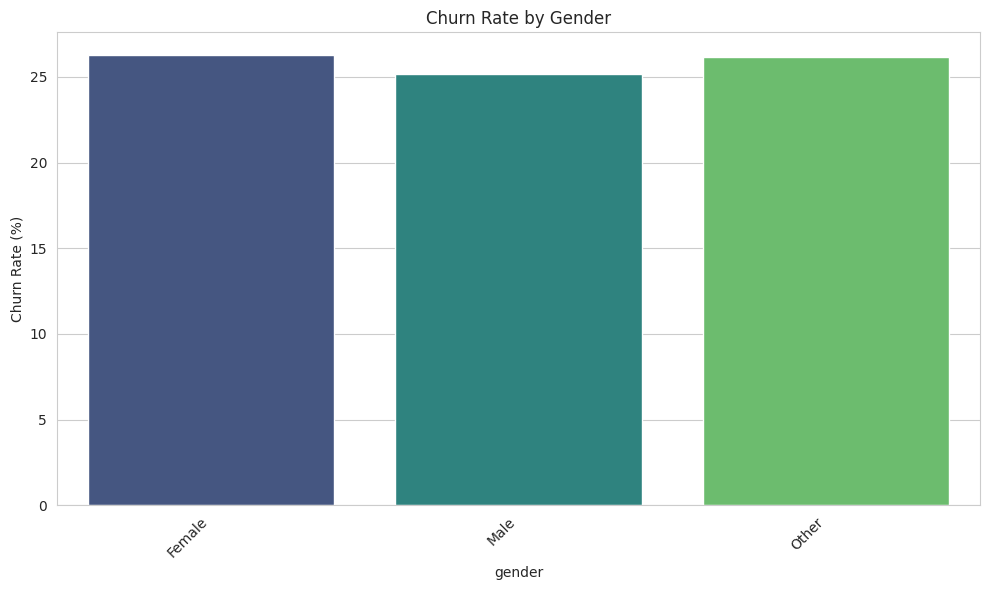

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


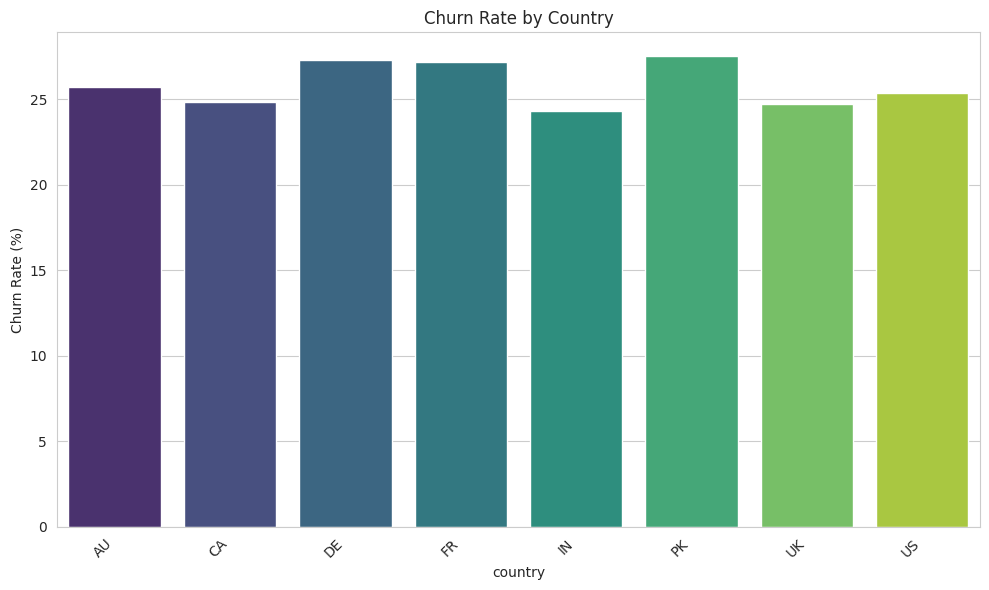

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


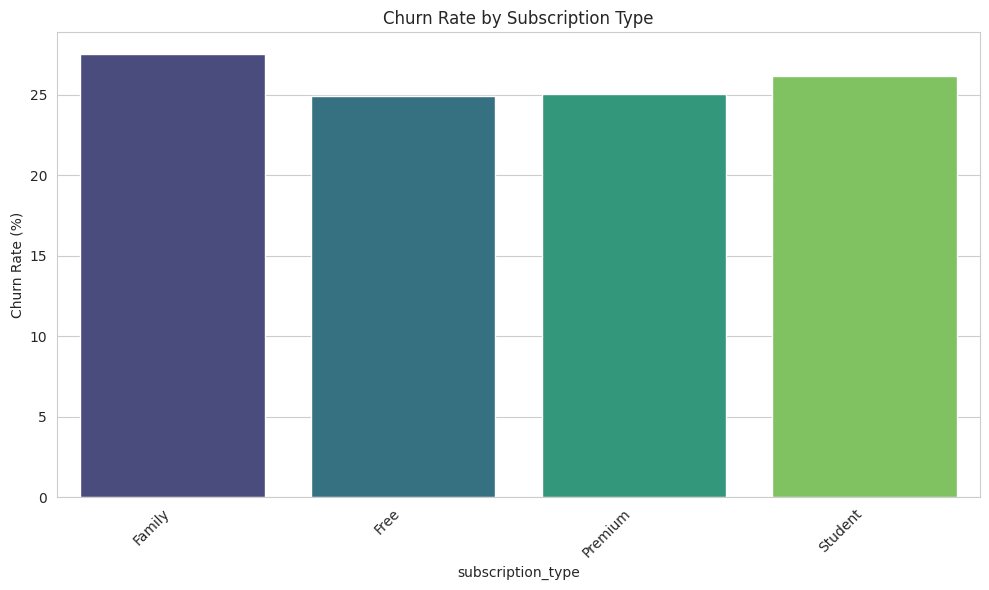

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


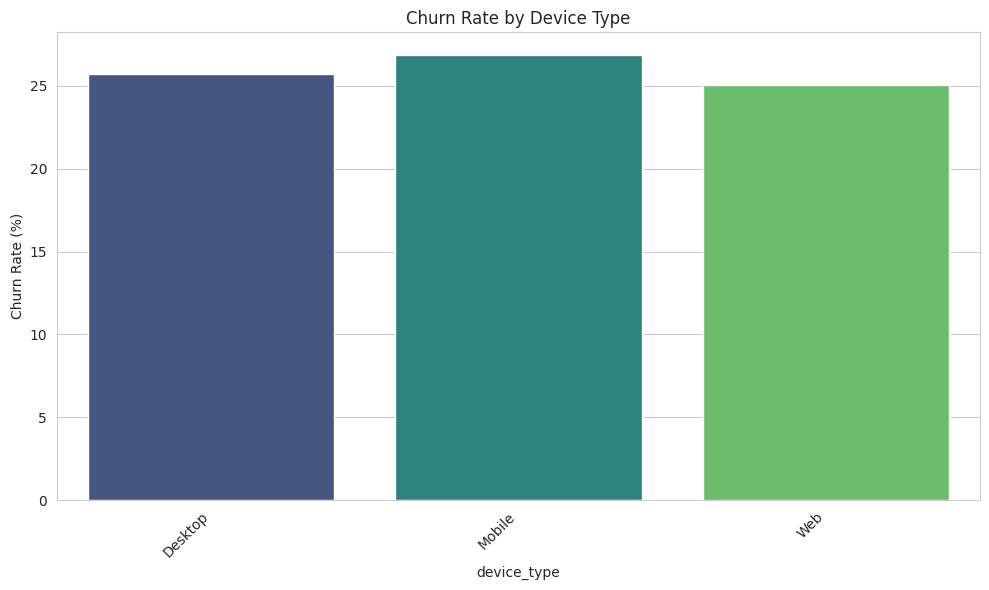

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


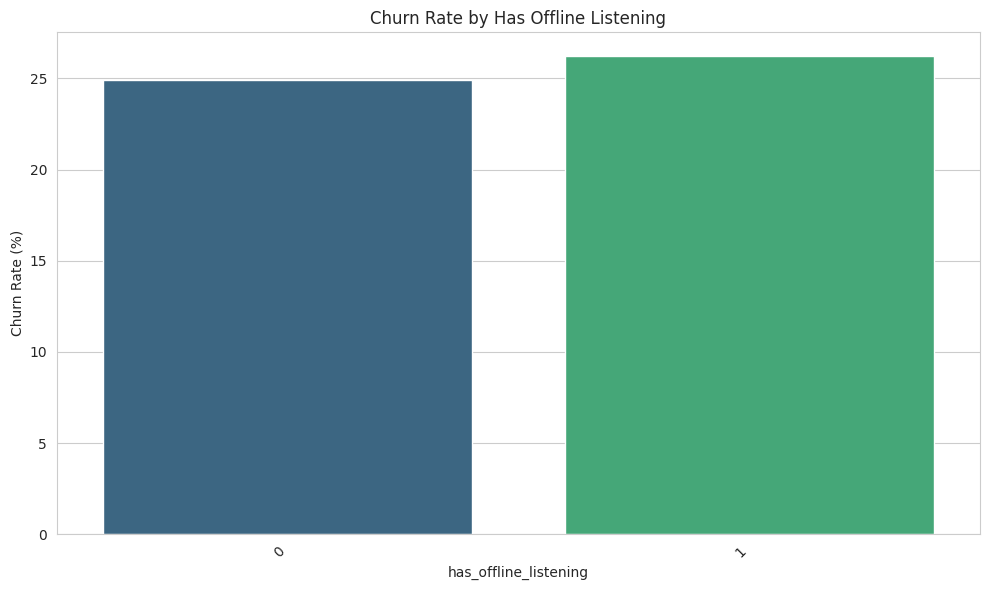

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


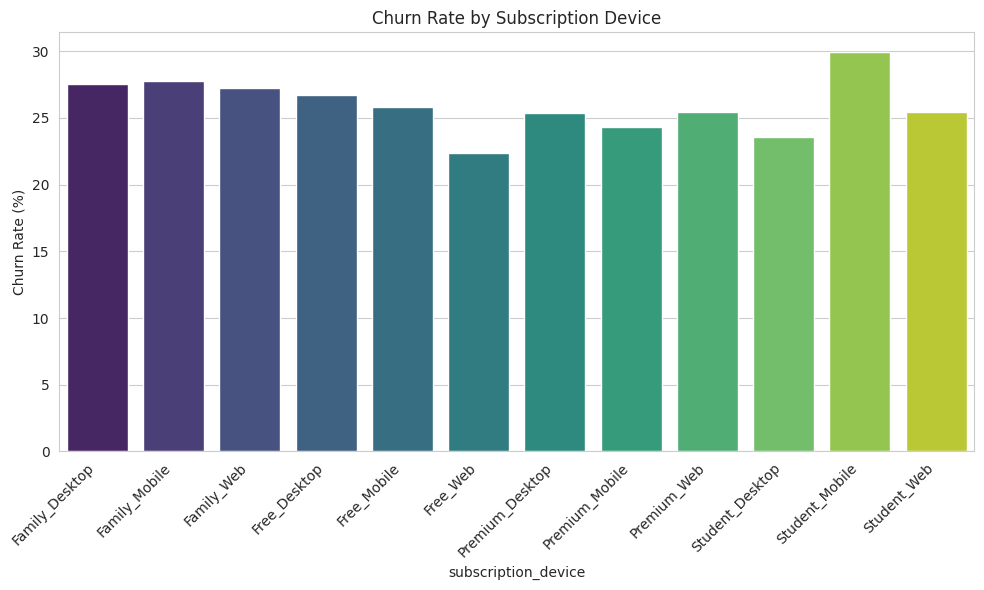

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


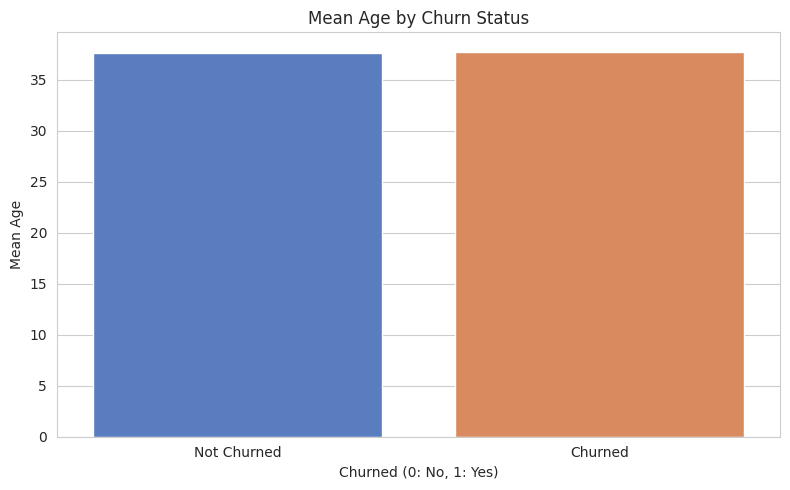

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


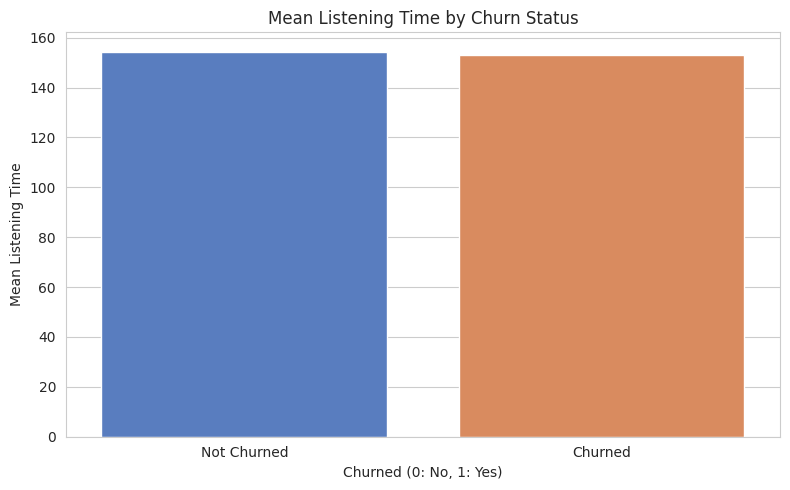

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


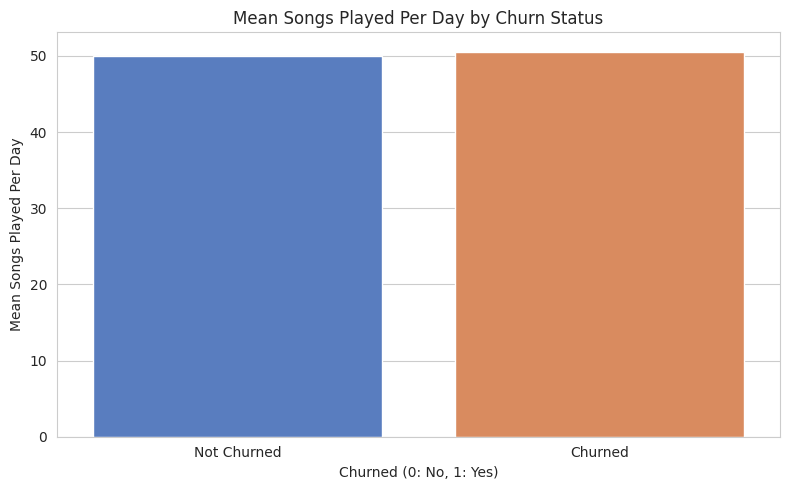

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


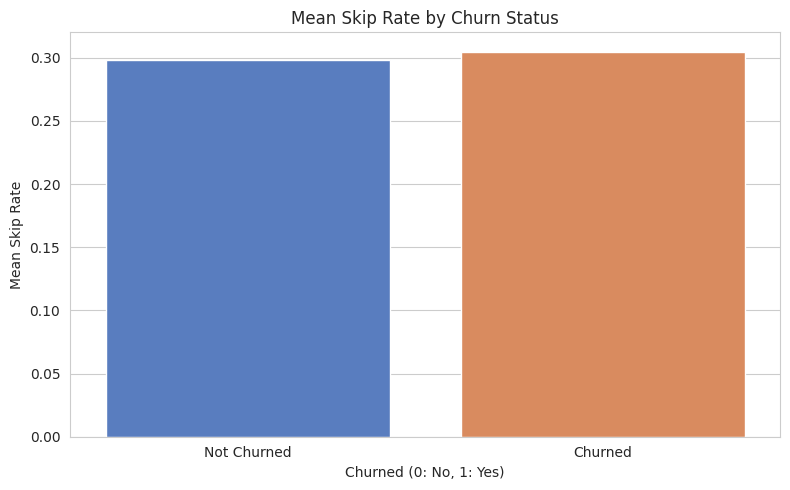

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


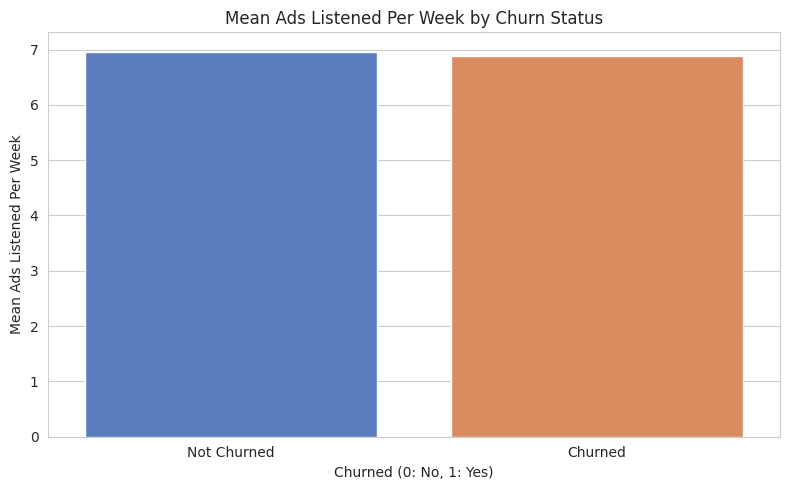

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


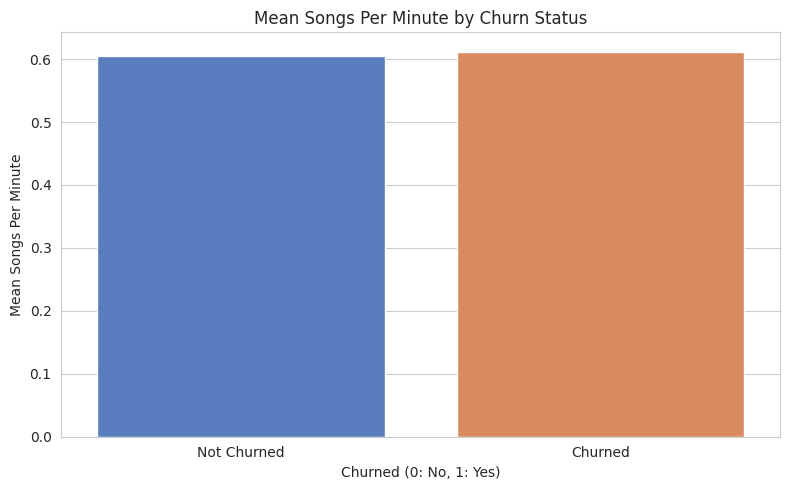

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Visualize churn rates by categorical features
for feature, df_pandas in churn_rates_by_category.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")
    plt.title(f"Churn Rate by {feature.replace('_', ' ').title()}")
    plt.ylabel("Churn Rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Visualize mean of numerical features by churn status
for feature, df_pandas in numerical_stats_by_churn.items():
    plt.figure(figsize=(8, 5))
    sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")
    plt.title(f"Mean {feature.replace('_', ' ').title()} by Churn Status")
    plt.xlabel("Churned (0: No, 1: Yes)")
    plt.ylabel(f"Mean {feature.replace('_', ' ').title()}")
    plt.xticks([0, 1], ["Not Churned", "Churned"])
    plt.tight_layout()
    plt.show()

## Churn analysis

### Subtask:
Analyze the characteristics of users who churn compared to those who don't. This could involve comparing demographics, usage patterns, or other relevant features.


**Reasoning**:
Analyze the previously generated `churn_rates_by_category` and `numerical_stats_by_churn` dictionaries to identify key characteristics of churned users and summarize the findings.



In [10]:
# Overall churn rate for reference
overall_churn_rate = 25.89

print("--- Analysis of Churn Characteristics ---")

print("\n1. Churn Rate by Categorical Features:")
for feature, df_pandas in churn_rates_by_category.items():
    print(f"\nFeature: {feature.replace('_', ' ').title()}")
    # Identify categories with significantly higher/lower churn rates
    high_churn_categories = df_pandas[df_pandas['churn_rate'] > overall_churn_rate * 1.1] # More than 10% above overall
    low_churn_categories = df_pandas[df_pandas['churn_rate'] < overall_churn_rate * 0.9] # More than 10% below overall

    if not high_churn_categories.empty:
        print("  Categories with Higher Churn Rates:")
        display(high_churn_categories)
    if not low_churn_categories.empty:
        print("  Categories with Lower Churn Rates:")
        display(low_churn_categories)
    if high_churn_categories.empty and low_churn_categories.empty:
        print("  Churn rates are relatively close to the overall average for this feature.")


print("\n2. Mean of Numerical Features by Churn Status:")
for feature, df_pandas in numerical_stats_by_churn.items():
    print(f"\nFeature: {feature.replace('_', ' ').title()}")
    churned_mean = df_pandas[df_pandas['is_churned'] == 1][f'{feature}_mean'].iloc[0]
    not_churned_mean = df_pandas[df_pandas['is_churned'] == 0][f'{feature}_mean'].iloc[0]

    print(f"  Mean for Churned Users ({churned_mean:.2f}) vs. Non-Churned Users ({not_churned_mean:.2f})")

    # Simple comparison of means
    if abs(churned_mean - not_churned_mean) > (not_churned_mean * 0.05): # More than 5% difference
         if churned_mean > not_churned_mean:
             print(f"  Churned users have a notably higher mean {feature.replace('_', ' ')}.")
         else:
             print(f"  Churned users have a notably lower mean {feature.replace('_', ' ')}.")
    else:
        print(f"  The mean {feature.replace('_', ' ')} is similar for churned and non-churned users.")

print("\n--- Summary of Key Characteristics of Churned Users ---")
print("Based on the analysis of churn rates by category and mean values of numerical features:")
print("- Categorical Features: Identify categories with significantly higher churn rates (e.g., specific countries, subscription types, device types, or combinations).")
print("- Numerical Features: Note numerical features where the mean value for churned users is notably different from non-churned users (either higher or lower).")
print("Further analysis could involve statistical tests to confirm the significance of these differences.")

--- Analysis of Churn Characteristics ---

1. Churn Rate by Categorical Features:

Feature: Gender
  Churn rates are relatively close to the overall average for this feature.

Feature: Country
  Churn rates are relatively close to the overall average for this feature.

Feature: Subscription Type
  Churn rates are relatively close to the overall average for this feature.

Feature: Device Type
  Churn rates are relatively close to the overall average for this feature.

Feature: Has Offline Listening
  Churn rates are relatively close to the overall average for this feature.

Feature: Subscription Device
  Categories with Higher Churn Rates:


,subscription_device,churn_rate
10,Student_Mobile,29.92


  Categories with Lower Churn Rates:


,subscription_device,churn_rate
5,Free_Web,22.335766



2. Mean of Numerical Features by Churn Status:

Feature: Age
  Mean for Churned Users (37.75) vs. Non-Churned Users (37.63)
  The mean age is similar for churned and non-churned users.

Feature: Listening Time
  Mean for Churned Users (152.98) vs. Non-Churned Users (154.45)
  The mean listening time is similar for churned and non-churned users.

Feature: Songs Played Per Day
  Mean for Churned Users (50.58) vs. Non-Churned Users (49.97)
  The mean songs played per day is similar for churned and non-churned users.

Feature: Skip Rate
  Mean for Churned Users (0.30) vs. Non-Churned Users (0.30)
  The mean skip rate is similar for churned and non-churned users.

Feature: Ads Listened Per Week
  Mean for Churned Users (6.89) vs. Non-Churned Users (6.96)
  The mean ads listened per week is similar for churned and non-churned users.

Feature: Songs Per Minute
  Mean for Churned Users (0.61) vs. Non-Churned Users (0.60)
  The mean songs per minute is similar for churned and non-churned users

## Build a churn prediction model (optional)

### Subtask:
Build a machine learning model using PySpark MLlib to predict churn. This involves preparing the data for modeling, training a model (e.g., Logistic Regression), and evaluating its performance.


**Reasoning**:
Prepare the features for machine learning by assembling numerical and categorical features into a single vector column using VectorAssembler. Handle categorical features by converting them into numerical representations using StringIndexer and OneHotEncoder.



In [11]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Define categorical and numerical features
categorical_features = ["gender", "country", "subscription_type", "device_type", "has_offline_listening", "subscription_device"]
numerical_features = ["age", "listening_time", "songs_played_per_day", "skip_rate", "ads_listened_per_week", "songs_per_minute"]

# Create stages for the pipeline
stages = []

# Index and One-Hot Encode categorical features
for category in categorical_features:
    indexer = StringIndexer(inputCol=category, outputCol=category + "_indexed", handleInvalid="keep")
    encoder = OneHotEncoder(inputCol=category + "_indexed", outputCol=category + "_encoded")
    stages += [indexer, encoder]

# Assemble all features into a single vector
assembler_inputs = [category + "_encoded" for category in categorical_features] + numerical_features
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features", handleInvalid="keep")
stages += [assembler]

# Create the pipeline
pipeline = Pipeline(stages=stages)

# Fit the pipeline to the data and transform it
pipeline_model = pipeline.fit(df)
df_transformed = pipeline_model.transform(df)

# Select the features and label column
model_data = df_transformed.select("features", col("is_churned").alias("label"))

model_data.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(38,[1,10,12,15,1...|    1|
|(38,[2,5,14,16,18...|    0|
|(38,[0,3,11,17,18...|    1|
|(38,[1,10,13,17,1...|    0|
|(38,[2,4,14,17,18...|    1|
+--------------------+-----+
only showing top 5 rows



**Reasoning**:
Split the data into training and testing sets, train a Logistic Regression model on the training data, make predictions on the testing data, and evaluate the model's performance using appropriate metrics.



In [12]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Split data into training and testing sets
train_data, test_data = model_data.randomSplit([0.8, 0.2], seed=42)

# Instantiate and train the Logistic Regression model
lr = LogisticRegression(labelCol="label", featuresCol="features")
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model
# Binary Classification Evaluator for AUC
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")
auc = binary_evaluator.evaluate(predictions)
print(f"Area Under ROC (AUC): {auc:.4f}")

# Multiclass Classification Evaluator for Accuracy, Precision, Recall, F1-score
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

accuracy = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "accuracy"})
precision = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "precisionByLabel"})
recall = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "recallByLabel"})
f1 = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "f1"})

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Area Under ROC (AUC): 0.5122
Accuracy: 0.7407
Precision: 0.7407
Recall: 1.0000
F1 Score: 0.6303


## Visualize results

### Subtask:
Visualize the findings from the analysis, including churn rates by categorical features and mean of numerical features by churn status.


**Reasoning**:
Visualize the churn rates by categorical features and the mean of numerical features by churn status as requested in the instructions.



/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


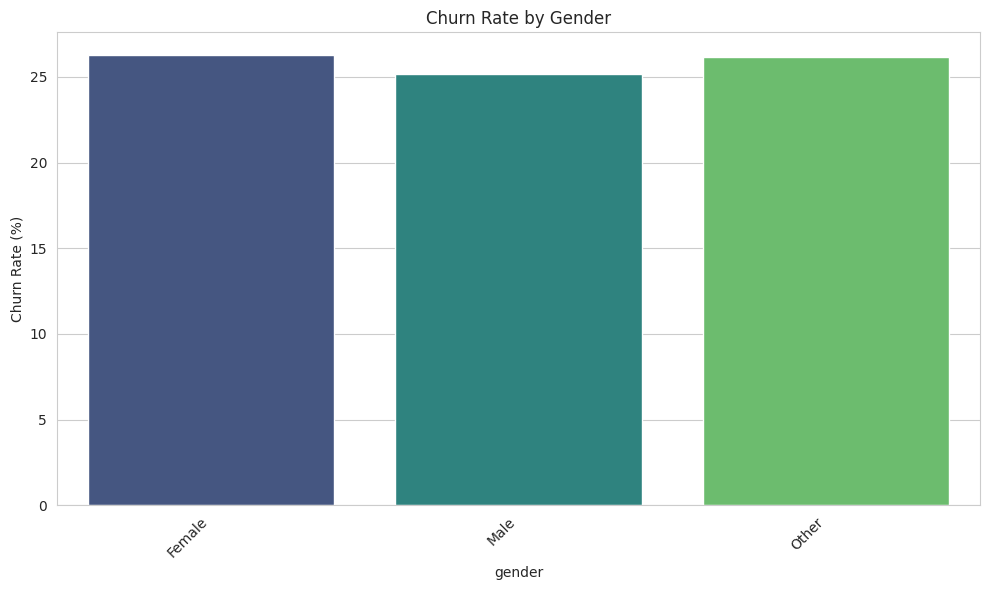

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


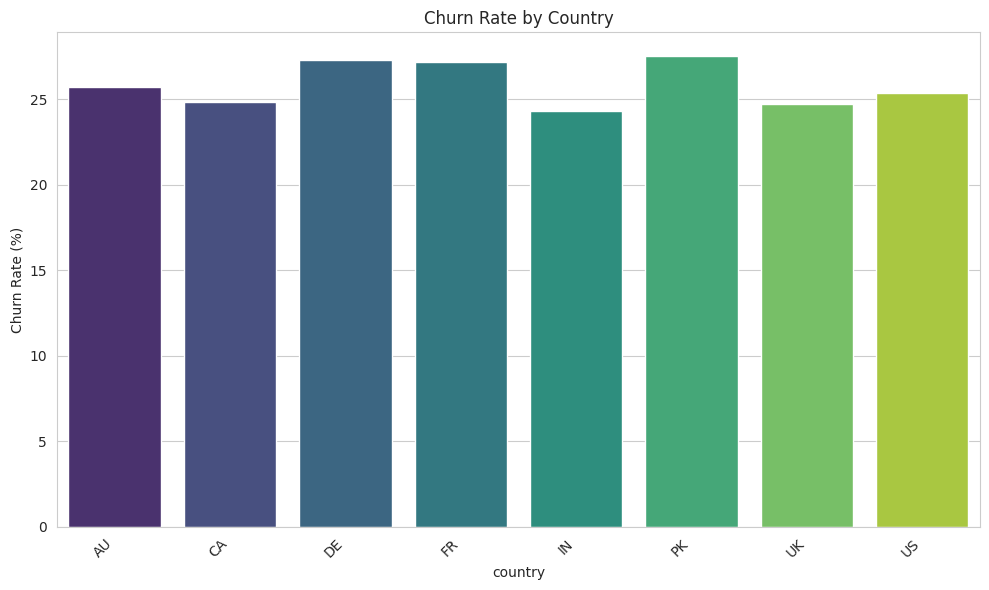

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


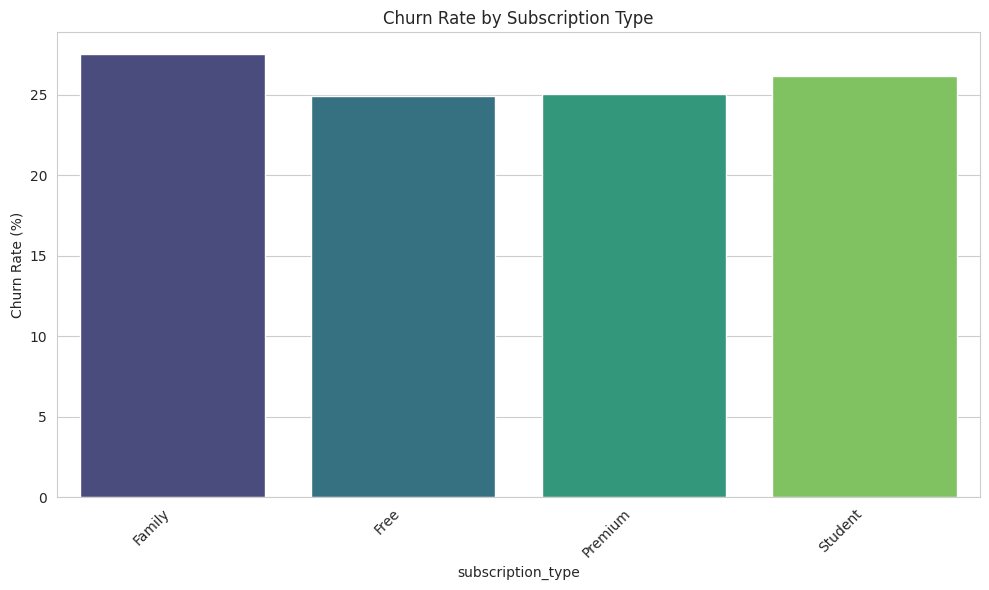

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


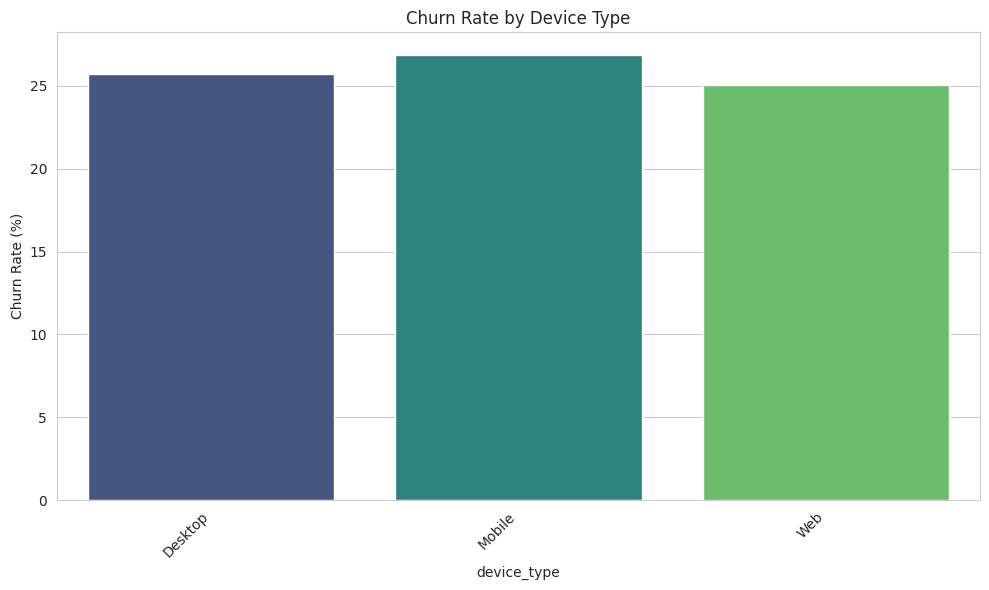

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


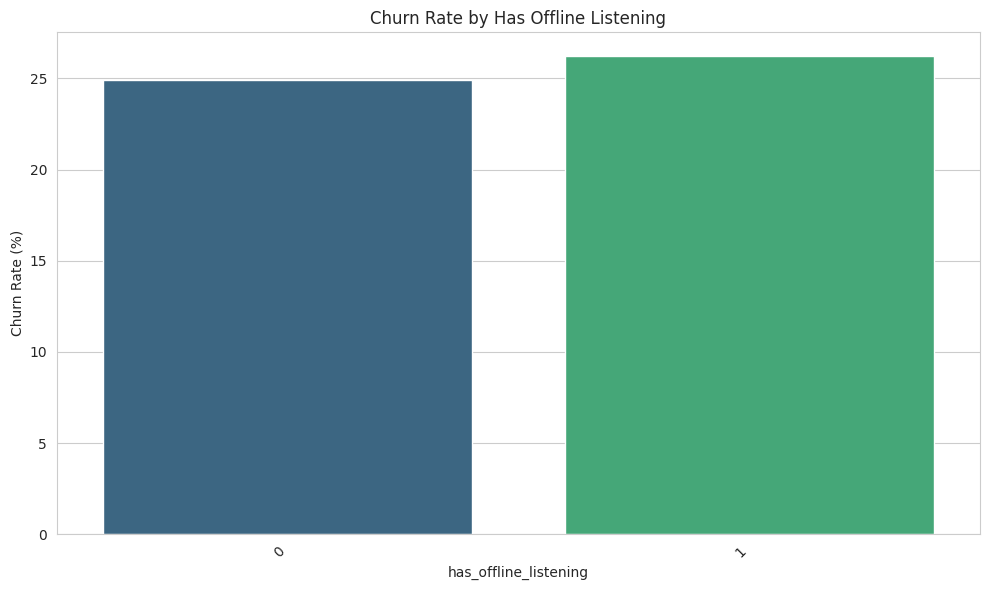

/tmp/ipython-input-305812992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")


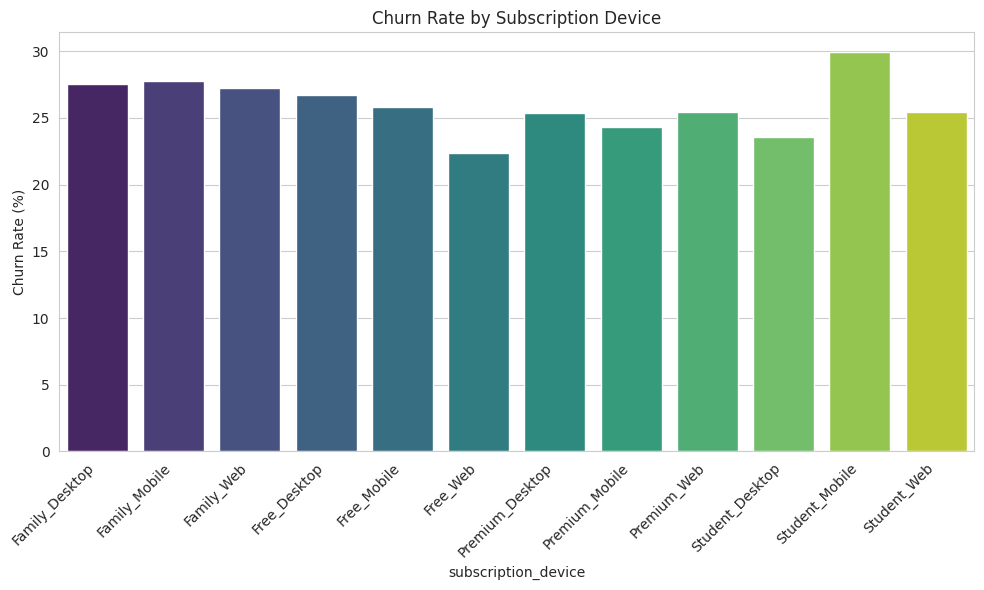

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


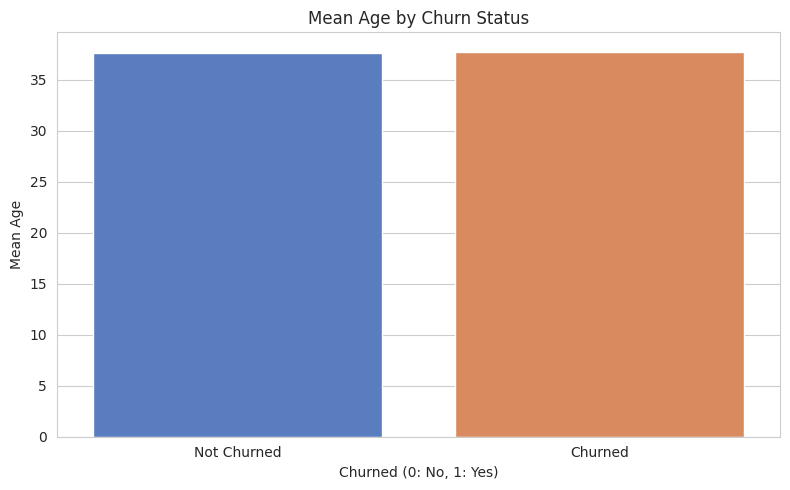

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


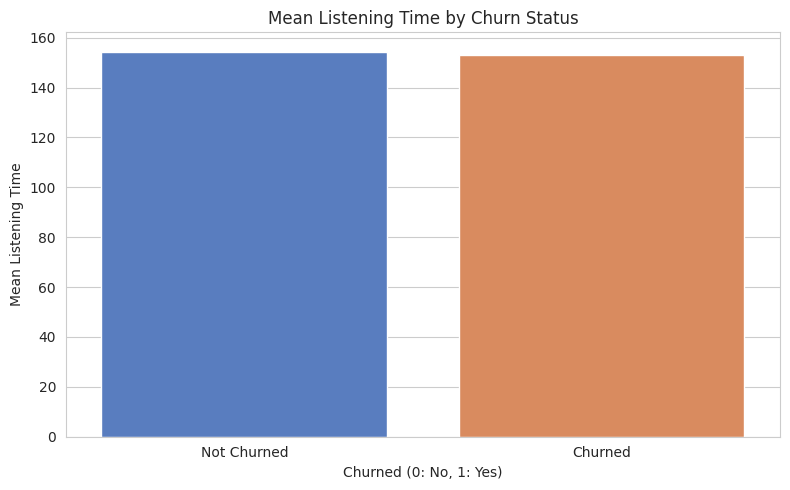

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


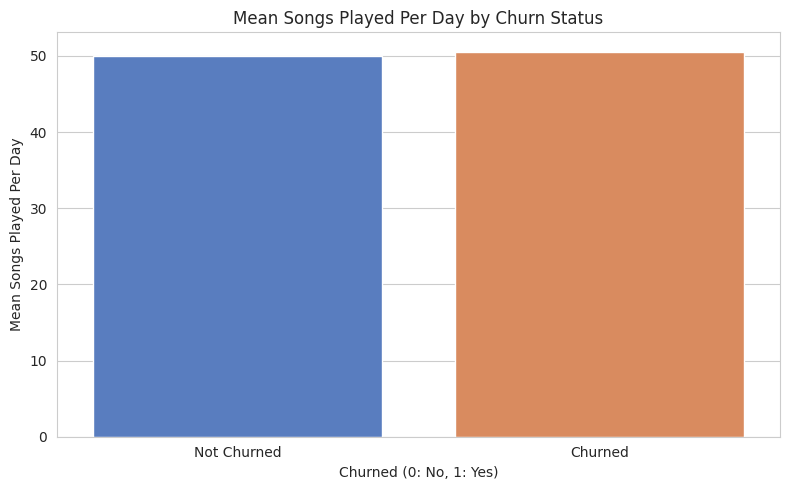

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


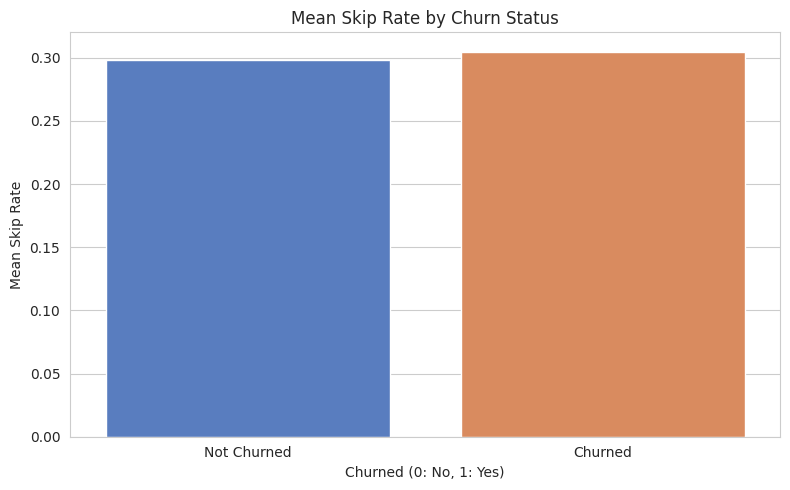

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


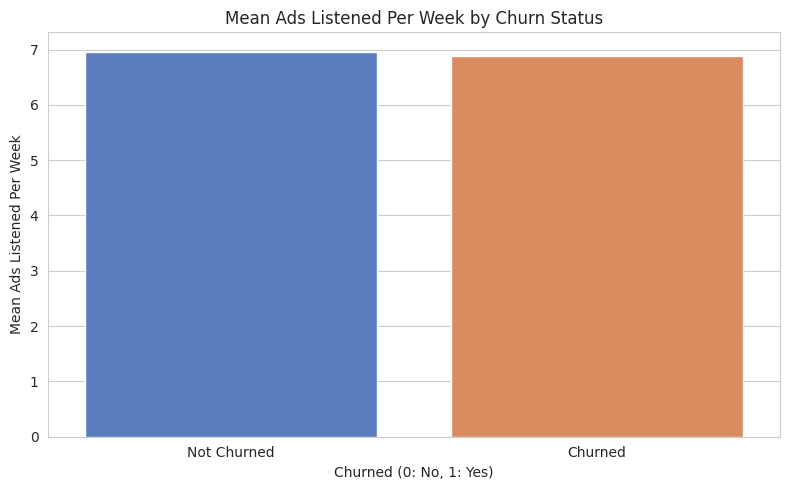

/tmp/ipython-input-305812992.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")


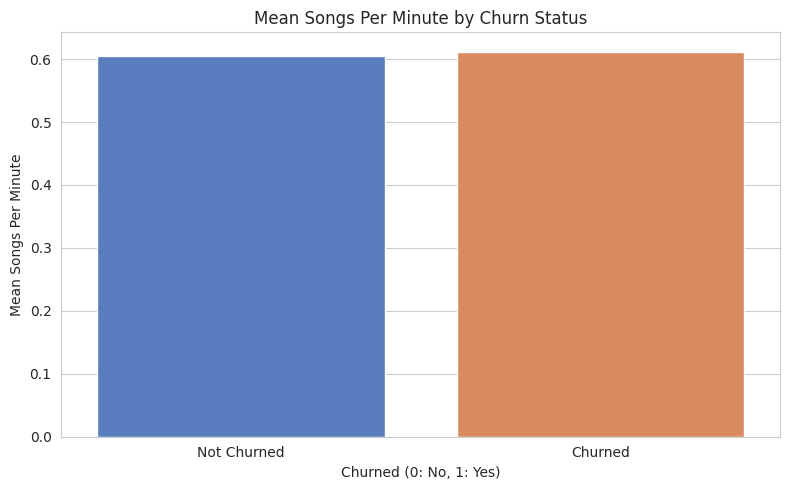

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Visualize churn rates by categorical features
for feature, df_pandas in churn_rates_by_category.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y="churn_rate", data=df_pandas, palette="viridis")
    plt.title(f"Churn Rate by {feature.replace('_', ' ').title()}")
    plt.ylabel("Churn Rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Visualize mean of numerical features by churn status
for feature, df_pandas in numerical_stats_by_churn.items():
    plt.figure(figsize=(8, 5))
    sns.barplot(x="is_churned", y=f"{feature}_mean", data=df_pandas, palette="muted")
    plt.title(f"Mean {feature.replace('_', ' ').title()} by Churn Status")
    plt.xlabel("Churned (0: No, 1: Yes)")
    plt.ylabel(f"Mean {feature.replace('_', ' ').title()}")
    plt.xticks([0, 1], ["Not Churned", "Churned"])
    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings
*   The overall churn rate in the dataset is approximately 25.89%.
*   Analysis of categorical features showed that the `subscription_device` combination had the most notable variations in churn rate. Specifically, users with a 'Student\_Mobile' combination had a higher churn rate (29.92%) compared to the overall average, while users with a 'Free\_Web' combination had a slightly lower rate (22.34%).
*   Comparison of mean values for numerical features between churned and non-churned users did not reveal significant differences (defined as more than a 5% difference in mean).
*   A Logistic Regression model built to predict churn achieved an Area Under ROC (AUC) of 0.5122 and an Accuracy of 0.7407, suggesting limited predictive power based on the current features and model.

### Insights or Next Steps
*   Focus future analysis and modeling efforts on the 'Student\_Mobile' user segment to understand the specific drivers of their higher churn rate.
*   Explore additional feature engineering or consider more complex machine learning models beyond Logistic Regression to potentially improve churn prediction performance.
